<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/SVM_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SVMs**

* SVMs are sensitive to feature scales
* There are two main issues with hard margin classifi‐
cation. First, it only works if the data is linearly separable, and second it is quite sensi‐
tive to outliers
* Smaller the value of C, wider the margin but more is the margin violations
* An overfitting SVM can be regularized by lowering C


In [3]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


#Pipeline for Linear SVMs

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ])
svm_clf.fit(X, y)
y_pred=svm_clf.predict(X)
print("Accuracy :", metrics.accuracy_score(y, y_pred))

Accuracy : 0.96


In [5]:
##Pipeline for non-linear SVMs;

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)
y_pred= polynomial_svm_clf.predict(X)
print('Accuracy :', metrics.accuracy_score(y, y_pred))

Accuracy : 0.96


In [7]:
## Polynomial Kernel

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])
poly_kernel_svm_clf.fit(X, y)

y_pred= poly_kernel_svm_clf.predict(X)
print('Accuracy :', metrics.accuracy_score(y, y_pred))

##> SVM classifier trained using a 3-degree polynomial kernel
##> hyperparameter coef0 controls how much of our model is influenced by high-degree polys v/s low-degree polys

Accuracy : 0.96


In [9]:
## Gaussian RBF Kernel
rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])
rbf_kernel_svm_clf.fit(X, y)

y_pred= rbf_kernel_svm_clf.predict(X)
print('Accuracy :', metrics.accuracy_score(y, y_pred))

## similar to C, gamma is a regularization parameter
'''smaller the gamma, wider the Bell, more is the influence of instance, decision boundary smoother.
   for larger gamma, reverse is true. if model is overfitting, gamma should be reduced'''

Accuracy : 0.6666666666666666


'smaller the gamma, wider the Bell, more is the influence of instance, decision boundary smoother.\n   for larger gamma, reverse is true. if model is overfitting, gamma should be reduced'

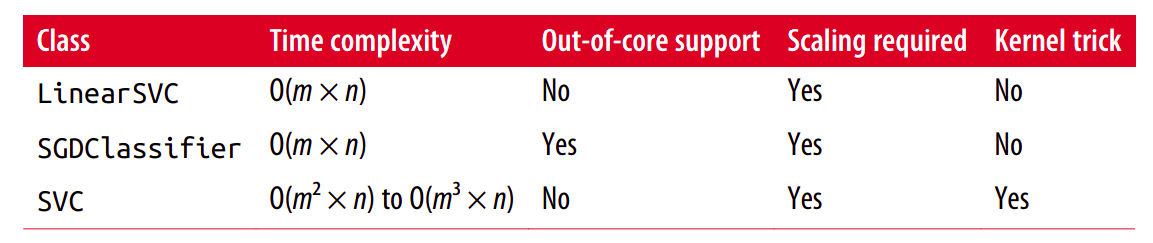

SVMs are versetile in the aspect that they can be used to classification( linear and non-linear) as well as regression. Here we try to fit as many instances as possible, within the margin. Adding more datapoints within the margin doesnt change the model predictions ir its e-insensitive

In [10]:
## SVM regression {linear}

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


LinearSVR(epsilon=1.5)

In [11]:
## SVM regression {non-linear}
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')